In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [4]:
def solver_difussion(boundary, dims, res, niter, tf, alpha, r_seed=None):
    x,y = np.meshgrid(np.linspace(0,dims[0],res[0]), np.linspace(0,dims[1],res[1]))

    if r_seed != None:  np.random.seed(r_seed)
    phi = np.random.rand(res[0],res[1])

    phi[:, -1] = boundary['right']
    phi[:,0] = boundary['left']
    phi[0,:] = boundary['bottom']
    phi[-1,:] = boundary['top']

    phi_new = phi.copy()

    for t in range(niter):
        for i in range(1, res[0]-1):
            for j in range(1, res[1]-1):
                phi_new[i,j] = ((tf/niter)*alpha/((dims[0]/res[0])**2))*(phi[i+1,j]+phi[i-1,j]+phi[i,j+1]+phi[i,j-1]-4*phi[i,j])-phi[i,j]
        phi = phi_new
    
        if ((tf/niter)*t)%1==0:
            plt.contourf(x,y,phi)
            plt.title(f'{(tf/niter)*t}s')
            plt.colorbar()
            plt.show()
    
    return x, y, phi

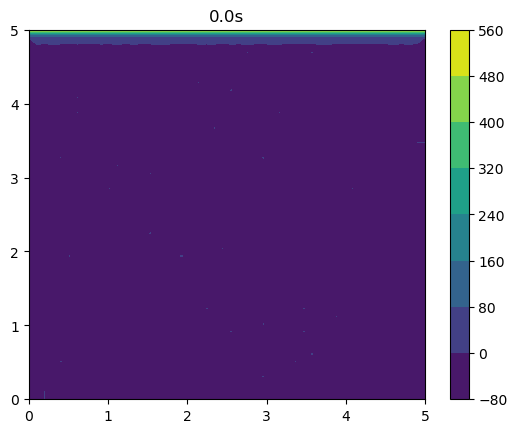

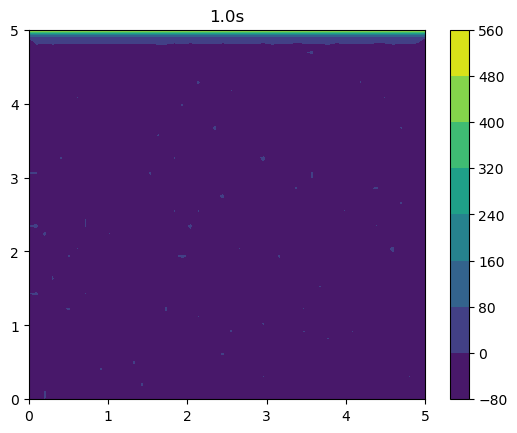

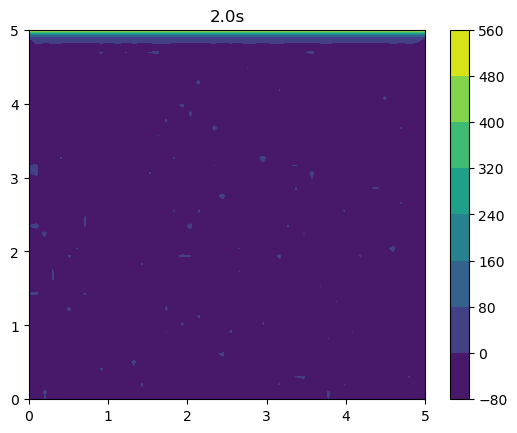

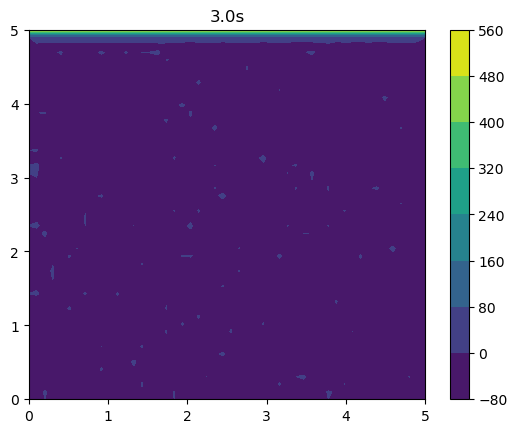

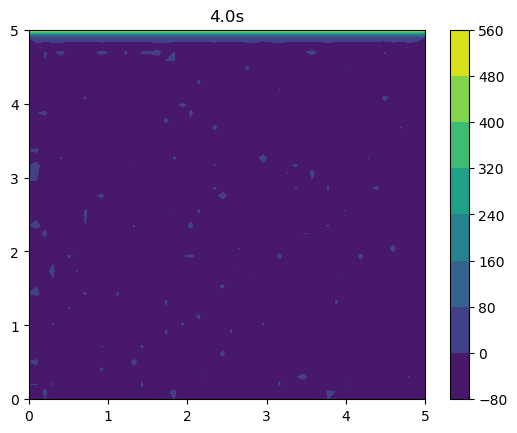

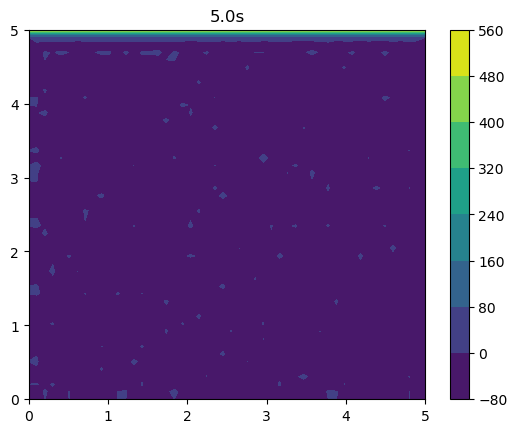

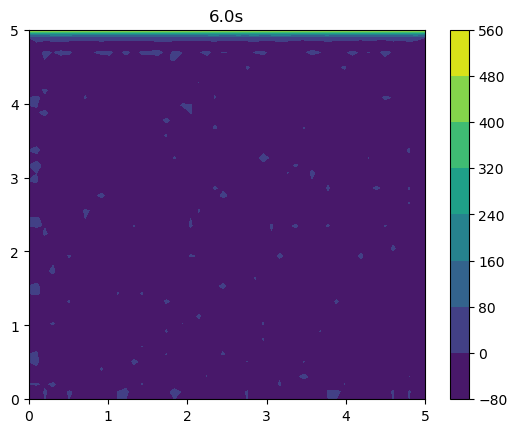

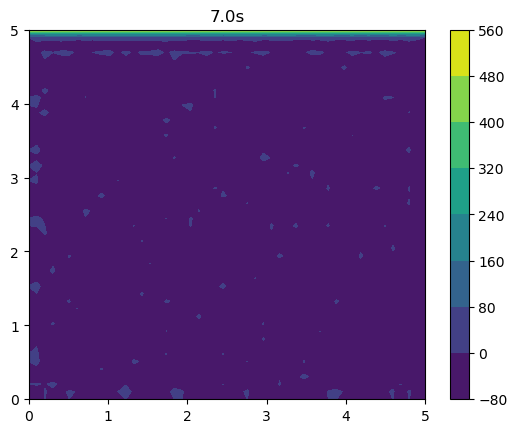

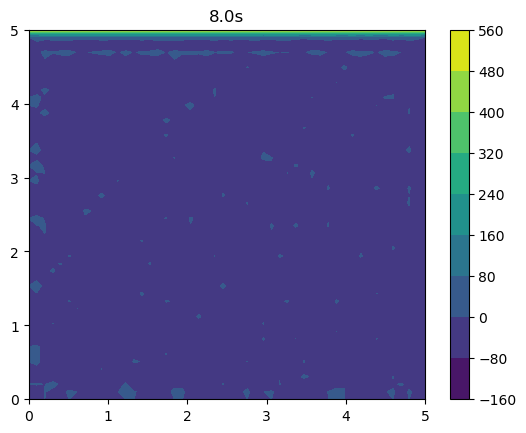

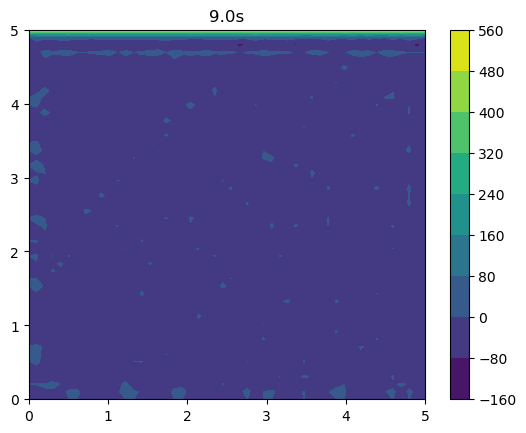

In [7]:
boundary = {'top':500,
         'bottom':0,
         'left':0,
         'right':0}

#         solver_difussion(boundary, dims, res, niter, tf, alpha, r_seed=None):
x,y,phi = solver_difussion(boundary,(5,5),(50,50),100,10,0.001)